# Tieteellinen laskenta, 25.11.22, Demot 5
Johannes Rajala


In [3]:
import numpy as np
import cmath as cm
import math
import random
import matplotlib.pyplot as plt
import scipy

### Tehtävä 1
#### a)

Näyttää normaalijakaumalta.

#### b)

In [38]:
def integral(x1, x2, a, b):
    integral = scipy.integrate.quad(lambda x: np.exp(-(x-b)**2/(2*a**2)), x1, x2) # Integroidaan funktio välillä [x1, x2]
    return [integral[0] - integral[1], integral[0] + integral[1]] # palautetaan integraalin luottamusväli

In [25]:
def erf_(x1, x2, a, b):
    erf1 = math.erf((x2-b)/(a*np.sqrt(2)))
    erf2 = math.erf((x1-b)/(a*np.sqrt(2)))
    return a*np.sqrt(np.pi / 2) * (erf1 - erf2)

Luodaan 1000 satunnaislukua a, b, x1, x2 ja tarkastetaan väite niille:

In [42]:
for i in range(1000):
    a = random.uniform(-10,10)
    b = random.uniform(-10,10)
    x1 = random.uniform(-10,10)
    x2 = random.uniform(11,20)
    success = []
    if((erf_(x1, x2, a, b) > integral(x1, x2, a, b)[0]) and (erf_(x1, x2, a, b) < integral(x1, x2, a, b)[1])): # tarkistetaan onko luku luottamusvälissä
        success.append(1)
    else:
        success.append(0)
    
print(np.mean(success))
    

1.0


### Tehtävä 2
#### a)

In [9]:
def integrand(x,y):
    return np.sin(2*x)*np.cos(4*y) # Integroitava funktio

def testi_integrand(x,y):
    return x*y # Toinen integroitava funktio

In [42]:
def riemann(integrand, a,b,c,d):
    print(f"Trigonometristen funktioitten integraali: {scipy.integrate.dblquad(integrand, a, b, c, d)}")
    print(f"Testifunktion xy integraali: {scipy.integrate.dblquad(lambda x,y: x*y, a, b, c, d)}")
    
riemann(integrand, 2,3,4,5)

Trigonometristen funktioitten integraali: (-0.13229279494049195, 5.625535561578141e-15)
Testifunktion xy integraali: (11.25, 1.4977162417837494e-13)


In [47]:
def simpson(integrand, a,b,c,d):
    pisteet = []
    n= 1001

    for x in np.linspace(a,b,n):
        piste_rivi = []
        for y in np.linspace(c,d,n):
            piste_rivi.append(integrand(x,y))
        pisteet.append(piste_rivi)

    summ = 0
    for pisterivi in pisteet:
        summ = summ + scipy.integrate.simpson(pisterivi)
    print(f"Trigonometristen funktioitten integraali: {summ/(n*n)}")

In [48]:
simpson(integrand, 2,3,4,5)

Trigonometristen funktioitten integraali: -0.24191465549812916


### Tehtävä 3

In [155]:
def generate_points(n):
    list_ = [] # Tyhjä lista johon onnistuneet pistepari generoinnit lisätään
    failed = [] # Mielenkiinnosta, mikä osuus generoinnista onnistuu
    while(len(list_) < 1001): # tehdään n paria
        x = random.uniform(-1,1) # generoidaan [-1,1] tasajakaumasta X koordinaatti  
        y = random.uniform(-1,1) # generoidaan [-1,1] tasajakaumasta Y koordinaatti  
        if(x**2+y**2<1):
            list_.append((x,y)) # Jos pistepari on yksikköympyrässä, se lisätään listaan 
        else:
            failed.append(1) # Jos pistepari ei ole yksikköympyrässä, lisätään epäonnistuneiden listaan 1
            
    return list_ # palautetaan lista onnistuneista pareista

In [157]:
def calculate_distance(points):
    distances = [] # pisteparien etäisyyslista
    for pair in points: # iteroidaan pisteparien yli
        distance = np.sqrt( pair[0]**2 + pair[1]**2 ) # lasketaan pisteiden eukliidinen etäisyys nollasta.
        distances.append(distance)  # lisätään pisteparien etäisyys nollasta listaan
    
    return np.mean(distances) # palautetaan etäisyyksien keskiarvo

In [158]:
for n in [1000, 1000, 30000]:
    print(f"Kun n={n}, niin keskietäisyys on: {calculate_distance(generate_points(n))}.")

Kun n=1000, niin keskietäisyys on: 0.6541557032750632.
Kun n=1000, niin keskietäisyys on: 0.6736356800818987.
Kun n=30000, niin keskietäisyys on: 0.6616868003545919.


### Tehtävä 4

In [140]:
def generate_random_matrix(n,a,b): # funktio joka generoi n*n ei-singulaarisen matriisin, jonka alkiot ovat generoitu [a,b] tasajakaumasta
    A = []
    for i in range(n):
        A.append([random.uniform(a,b) for i in range(n)]) # Luodaan matriisi rivi kerrallaan
    if(np.linalg.det(A)==0):
        raise Exception("Matriisin determinantti on 0") # Ei singulaarisia matriiseja, sillä käänteismatriisia tarvitaan seuraavassa vaiheessa
    return A

In [141]:
def solve_linear_system(A, b):
    x = [] # Tyhjä lista, johon ratkaisut lisätään
    A_t = np.transpose(A) # Matriisin A transpoosi
    A_det_inv = 1/np.linalg.det(A) # Matriisin A determinantin käänteisluku
    for j in range(len(A)): # Iteroidaan matriisin A transpoosin sarakkeiden yli
        A_t_ = A_t.copy() # Alustetaan sykilin alussa väliaikaiken matriisi matriisin A avulla
        A_t_[j] = b # Korvataan väliaikaisen matriisin sarake j vektorilla b
        x.append(A_det_inv * np.linalg.det(A_t_)) # lasketaan determinantti, ja lisätään tulo listaan x
    
    return x

In [144]:
# Visuaalinen tarkastelu
n = 3
b = [1,2,3] # Generodiaan n*1 vektori
M = generate_random_matrix(n,-10,10) # Generoidaan n*n satunnaismatriisi

np.matmul(M,solve_linear_system(M, b))

array([1., 2., 3.])

In [279]:
# Ääriarvotarkastelu
n = 180 
b = [random.uniform(-10,10) for i in range(n)] # Generodiaan n*1 satunnaisvektori
M = generate_random_matrix(n,-10,10) # Generoidaan n*n satunnaismatriisi

In [280]:
print(f"Tarkastus {n}x{n} matriisille {int(np.exp(1/n + 1.5)+0.5)}:n desimaalin tarkkuudella: {[round(entry, int(np.exp(1/n + 1.5)+0.5)) for entry in np.matmul(M,solve_linear_system(M, b))] == [round(entry, int(np.exp(1/n + 1.5)+0.5)) for entry in b]}") # Tarkistus

Tarkastus 180x180 matriisille 5:n desimaalin tarkkuudella: True


### Tehtävä 5

In [154]:
h = (3000/1000) / (np.pi * (1.3/2)**2)
print(f"Astian korkeus on {h} metriä.")

Astian korkeus on 2.260188540949993 metriä.


In [173]:
def volume(V, r, x):
    left = r**2 * np.arccos((r-x)/r)
    right = (r-x)*np.sqrt(r**2 - (r-x)**2)
    return (V/(np.pi*r**2)) * (left - right)

In [186]:
print(f"n   m      V")
for n in range(1,15):
    print(f"{n}  {round((n-1)*0.05, 2)}    {round(volume(3, 0.65, ((n-1)*0.05)), 2)}")

n   m      V
1  0.0    0.0
2  0.05    0.04
3  0.1    0.11
4  0.15    0.19
5  0.2    0.29
6  0.25    0.4
7  0.3    0.52
8  0.35    0.65
9  0.4    0.78
10  0.45    0.92
11  0.5    1.06
12  0.55    1.21
13  0.6    1.35
14  0.65    1.5


In [206]:
print(f"Säiliössä on 1000 litraa, kun öljynpinnan korkeus on: {round(scipy.optimize.root(lambda x: volume(3,0.65, x) - 1, 0.5)['x'][0], 3)} metriä.")

Säiliössä on 1000 litraa, kun öljynpinnan korkeus on: 0.478 metriä.


### Tehtävä 6

In [267]:
def generate_roots(n):
    coefficients = [random.uniform(0,10) for i in range(n+1)] # generoidaan n+1 satunnaislukua polynomin kertoimiksi
    coefficients = sorted(coefficients, reverse = True) # Järjestetään ne pienenevään järjestykseen
    polynomial = np.polynomial.polynomial.Polynomial(coefficients) # Muodostetaan näistä kertoimista polynomi
    roots = polynomial.roots() # Etsitään polynomin juuret
    x = [root.real for root in roots]
    y = [root.imag for root in roots]
    return(x,y)

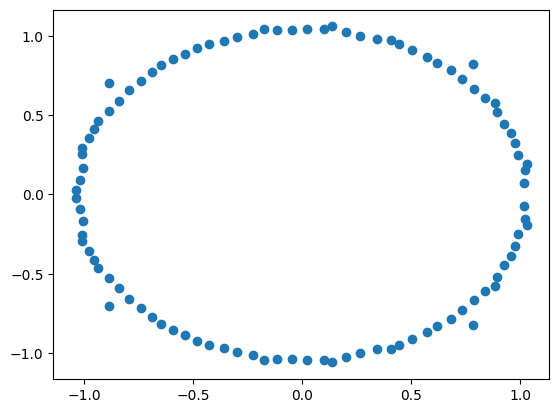

In [275]:
data = generate_roots(100)
plt.scatter(data[0], data[1])